<a href="https://colab.research.google.com/github/FinMind/FinMind/blob/master/FinMind/BackTesting/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install FinMind

In [0]:
from FinMind.BackTesting import BackTest
import pandas as pd

In [0]:
#------------------------------------------------------------------------------
# example strategy
class demo:
    def __init__(self,
                 stock_price,
                 **kwargs,):
        #-------------------------------------------------------------------    
        # 此區塊請勿更動
        stock_price = stock_price.sort_values('date')
        # 股價
        self.stock_price = stock_price
        # 融資融券
        self.MarginPurchaseShortSale = kwargs.get("MarginPurchaseShortSale", pd.DataFrame())
        # 三大法人買賣
        self.InstitutionalInvestorsBuySell = kwargs.get("InstitutionalInvestorsBuySell", pd.DataFrame())
        # 外資持股
        self.Shareholding = kwargs.get("Shareholding", pd.DataFrame())
        # 此區塊請勿更動
        #-------------------------------------------------------------------
    
    def trade(self,date):
        ''' 
        此區塊，可進行資料處理、做技術指標，寫自己的策略，
        寫你自己的策略, 必須 return : 1 (買) or -1 (賣) or 0 (不操作)
        根據時間date，回傳當下要進行什麼操作 ( 買/賣/不操作 )
        '''
        # example
        from random import randint
        
        x = randint(1,10)
        x = x%3
        if x == 1:
            return 1
        elif x == 2:
            return -1
        elif x == 0:
            return 0
#------------------------------------------------------------------------------
            

mean profit 11950.610467289722
max loss -21750.0
now_profit 29495.0
mean profit per 1.57%
max loss per -2.85%
now_profit per 3.87%


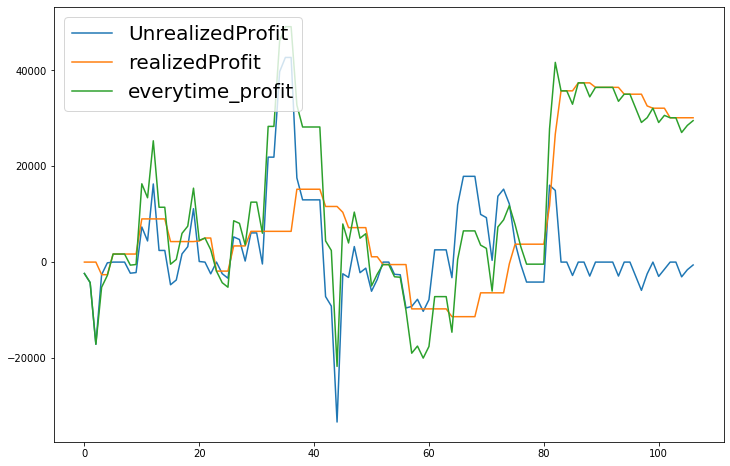

In [4]:

# 初始化回測架構
self = BackTest.BackTest(
        stock_id = '2316',
        user_funds = 1000000,# 使用者資金
        tax = 0.005,# 稅
        fee = 0.005,# 手續費
        day = None,# 近 n 天
        month = None,# 近 n 月
        year = 1,# 近 n 年
        )
# 輸入策略
self.import_strategy(strategy = demo)
# 模擬每天交易
self.selenium_everyday()
# 累積獲利畫圖
# UnrealizedProfit : 未實現損益
# realizedProfit : 已實現損益
# everytime_profit : 當下結算獲利
self.cum_profit_plot()
# 計算平均獲利、最大損失
self.calculate_mean_profit_max_loss()

print('mean profit {}'.format( self.mean_profit) )
print('max loss {}'.format( self.max_loss) )
print('now_profit {}'.format( self.now_profit) )

print('mean profit per {}%'.format( self.mean_profit_per) )
print('max loss per {}%'.format( self.max_loss_per) )
print('now_profit per {}%'.format( self.now_profit_per) )
    